In [1]:
pip freeze > model_requirements.txt    

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train_df = pd.read_csv("data_train_csv")
data_smauto_train_df = pd.read_csv("data_smauto_train_csv")
data_smin_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [14]:
print(f'Data_train: {data_train_df.shape}, Data smauto: {data_smauto_train_df.shape}, Data smin: {data_smin_train_df.shape}')

Data_train: (192638, 10), Data smauto: (293598, 10), Data smin: (288041, 10)


In [4]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [16]:
print(data_train_df['Winner_num'].value_counts())
print(data_smauto_train_df['Winner_num'].value_counts())
print(data_smin_train_df['Winner_num'].value_counts())

Winner_num
0    97866
2    92309
1     2463
Name: count, dtype: int64
Winner_num
0    97866
2    97866
1    97866
Name: count, dtype: int64
Winner_num
0    97866
1    97866
2    92309
Name: count, dtype: int64


Random Forest model

Train the baseline RF classifier

NOTE: Should I turn this into a function to call here and at the end?

In [17]:
def rf(train_data, test_data, val_data, sample, proportion):
    #own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
    from data_formatting import data_format
    X_train, X_test, X_val, y_train, y_test, y_val = data_format(train_data, test_data, val_data, sample, proportion)

    model = RandomForestClassifier(random_state=7)
    model.fit(X_train, y_train)

    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"Training score: {model_train_score}, Testing score: {model_test_score}" )

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Team 1', 'Tie', 'Team 2'])

    cmd.plot()
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    print(classification_report(y_test, y_pred))

Training score: 0.9700007267517312, Testing score: 0.9265043298053438


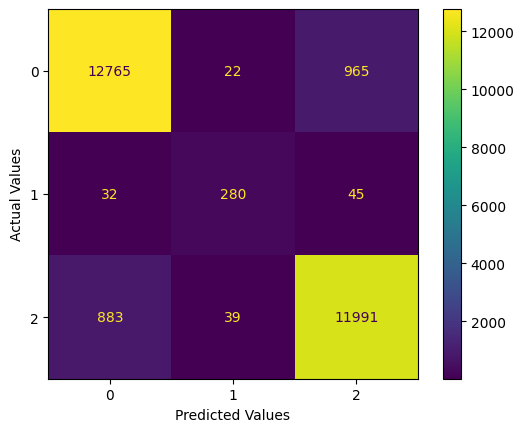

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13752
           1       0.82      0.78      0.80       357
           2       0.92      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.88      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [18]:
rf(data_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9803098113747369, Testing score: 0.9293168529346458


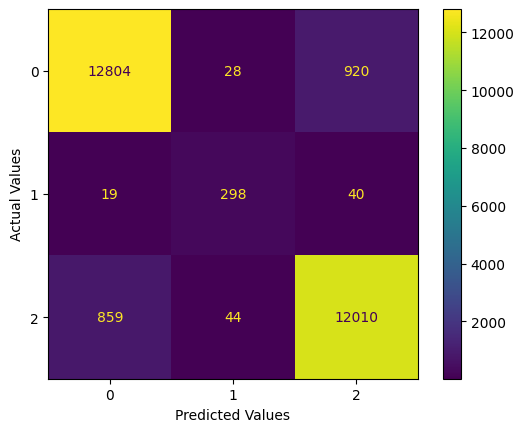

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.81      0.83      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [19]:
rf(data_smauto_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9799334122572828, Testing score: 0.9297979424172896


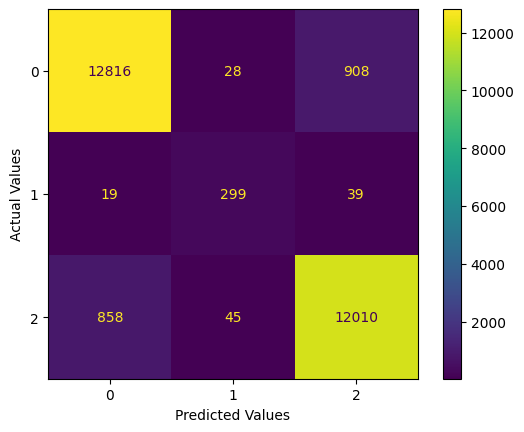

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.80      0.84      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [20]:
rf(data_smin_train_df, data_test_df, data_val_df, None, None)

Using min because recall is the more importantmetric in this case. Recall is the number of true positives/ true positives + False negatives.  I.e. out of the number of times it was actually positive, how many times did we predict it to be so.  Not as much of a concern for false negatives in category 1 because it has less impact than incorrectly giving the win to another team.

<ins>**Tune the RF**</ins>

Because I'm using the full data, chosen to train on each parameter in turn and plot results.  In other models, chose to run the combinations but I used a sample of the data instead.

In [5]:
X_train, X_test, X_val, y_train, y_test, y_val = data_format(data_smin_train_df, data_test_df, data_val_df, None, None)

In [ ]:
#Tuning on Estimators as well as the below

param_grid = {
    'max_depth': [10, 20, 30, 40 ,50, 60, 70, 80, 90, 100],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_terminal_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

1 n_estimators, Train Accuracy: 0.9658416683735996, Validation Accuracy: 0.8964011471921547
6 n_estimators, Train Accuracy: 0.9787842702948538, Validation Accuracy: 0.9269312609862151
11 n_estimators, Train Accuracy: 0.9795515221791342, Validation Accuracy: 0.9295957072809695
16 n_estimators, Train Accuracy: 0.9797563541301412, Validation Accuracy: 0.9304838560458877
21 n_estimators, Train Accuracy: 0.9798257886898045, Validation Accuracy: 0.9310019428254233
26 n_estimators, Train Accuracy: 0.9798605059696363, Validation Accuracy: 0.9310204459246924
31 n_estimators, Train Accuracy: 0.9798882797935016, Validation Accuracy: 0.931242483115922
36 n_estimators, Train Accuracy: 0.979895223249468, Validation Accuracy: 0.9315755389027662
41 n_estimators, Train Accuracy: 0.9799056384334175, Validation Accuracy: 0.9315015265056897
46 n_estimators, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9315755389027662
51 n_estimators, Train Accuracy: 0.9799195253453501, Validation Accuracy: 0

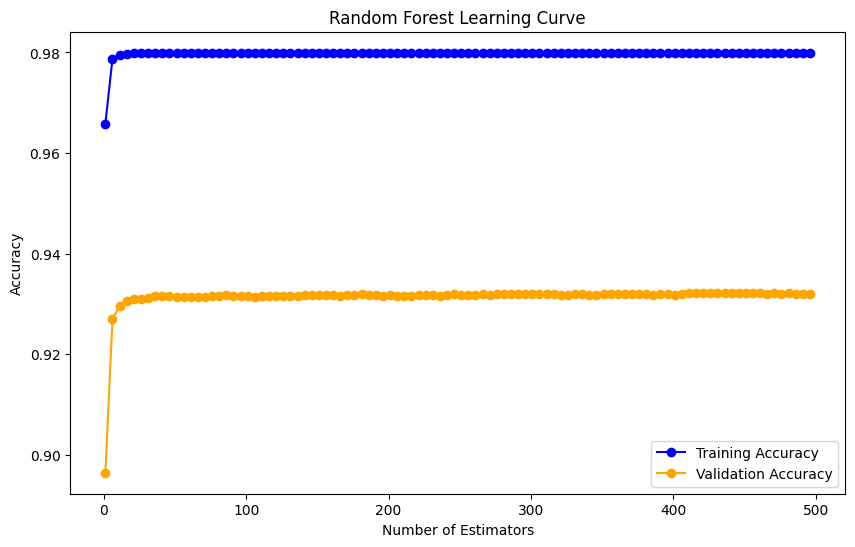

In [25]:
best_accuracy = 0
estimators = []
train_acc_list = []
val_acc_list = []
for e in range(1,500, 5):
    estimators.append(e)

    model = RandomForestClassifier(n_estimators=e, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{e} n_estimators, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_estimators = e
    
estimators_df = pd.DataFrame({'Estimators': estimators,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best accuracy is: {best_accuracy} and estimators is {best_estimators}")

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(estimators_df['Estimators'], estimators_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(estimators_df['Estimators'], estimators_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

Max Depth

10 max depth, Train Accuracy: 0.8493478358983617, Validation Accuracy: 0.7758719585530577
20 max depth, Train Accuracy: 0.9767845549765485, Validation Accuracy: 0.9394393560921455
30 max depth, Train Accuracy: 0.9798882797935016, Validation Accuracy: 0.9319085946896105
40 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9316125451013044
50 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
60 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
70 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
80 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
90 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
100 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132


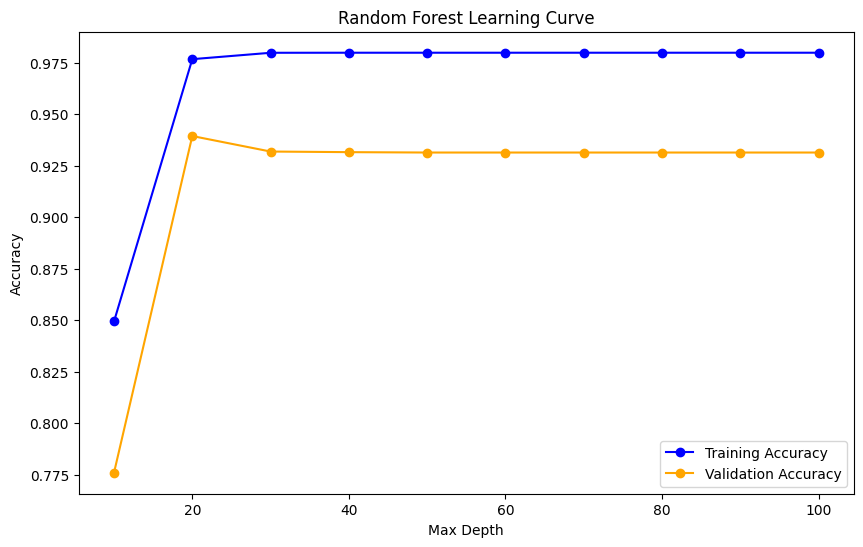

In [26]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in param_grid['max_depth']:
    depth_list.append(md)

    model = RandomForestClassifier(n_estimators=50, max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_depth= md
    
depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

15 max depth, Train Accuracy: 0.945705646071219, Validation Accuracy: 0.9097048755666575
16 max depth, Train Accuracy: 0.9563187185157669, Validation Accuracy: 0.9234526783236192
17 max depth, Train Accuracy: 0.964248145229325, Validation Accuracy: 0.9320196132852253
18 max depth, Train Accuracy: 0.9705979357105412, Validation Accuracy: 0.938366176334536
19 max depth, Train Accuracy: 0.9746702726347986, Validation Accuracy: 0.9406420575446387
20 max depth, Train Accuracy: 0.9767845549765485, Validation Accuracy: 0.9394393560921455
21 max depth, Train Accuracy: 0.9782426807294795, Validation Accuracy: 0.9378110833564622
22 max depth, Train Accuracy: 0.9789196676861974, Validation Accuracy: 0.9363493385142011
23 max depth, Train Accuracy: 0.9792841991244302, Validation Accuracy: 0.9352391525580535
24 max depth, Train Accuracy: 0.9795306918112352, Validation Accuracy: 0.9341844758997132


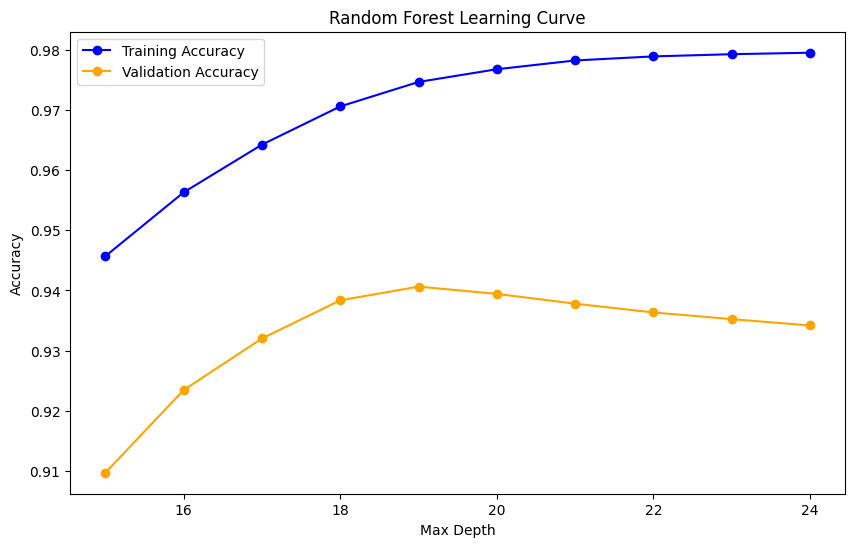

In [27]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in range(15, 25):
    depth_list.append(md)

    model = RandomForestClassifier(n_estimators=50, max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_depth= md
    
depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [28]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_terminal_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

1 max features, Train Accuracy: 0.9677684774042584, Validation Accuracy: 0.9246923859746508
2 max features, Train Accuracy: 0.9746702726347986, Validation Accuracy: 0.9406420575446387
3 max features, Train Accuracy: 0.9754757135268938, Validation Accuracy: 0.9426959015635119
4 max features, Train Accuracy: 0.9758784339729414, Validation Accuracy: 0.9420482930890924
5 max features, Train Accuracy: 0.9757708104054631, Validation Accuracy: 0.9423073364788602
6 max features, Train Accuracy: 0.9748542742179065, Validation Accuracy: 0.9423628457766676
7 max features, Train Accuracy: 0.9730107866588437, Validation Accuracy: 0.940975113331483
8 max features, Train Accuracy: 0.9620609565999285, Validation Accuracy: 0.92894809880655


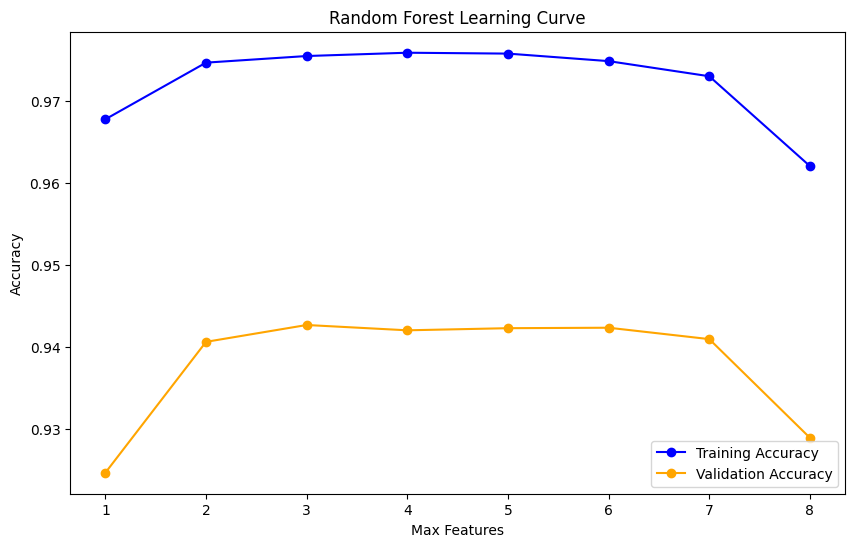

In [29]:
best_accuracy = 0
maxfeatures_list = []
train_acc_list = []
val_acc_list = []
for mf in range(1,9):
    maxfeatures_list.append(mf)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=mf,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mf} max features, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_maxfeatures= mf
    
mf_df = pd.DataFrame({'Max Features': maxfeatures_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.plot(mf_df['Max Features'], mf_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mf_df['Max Features'], mf_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [30]:
param_grid = {'min_samples_split': [10, 50, 100, 200],
    'max_leaf_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

10 min sample, Train Accuracy: 0.9733475442732111, Validation Accuracy: 0.9447867517809233
50 min sample, Train Accuracy: 0.9608979277255668, Validation Accuracy: 0.9342399851975206
100 min sample, Train Accuracy: 0.9439524234397186, Validation Accuracy: 0.9114256637986863
200 min sample, Train Accuracy: 0.9196781013814006, Validation Accuracy: 0.8786381718937922


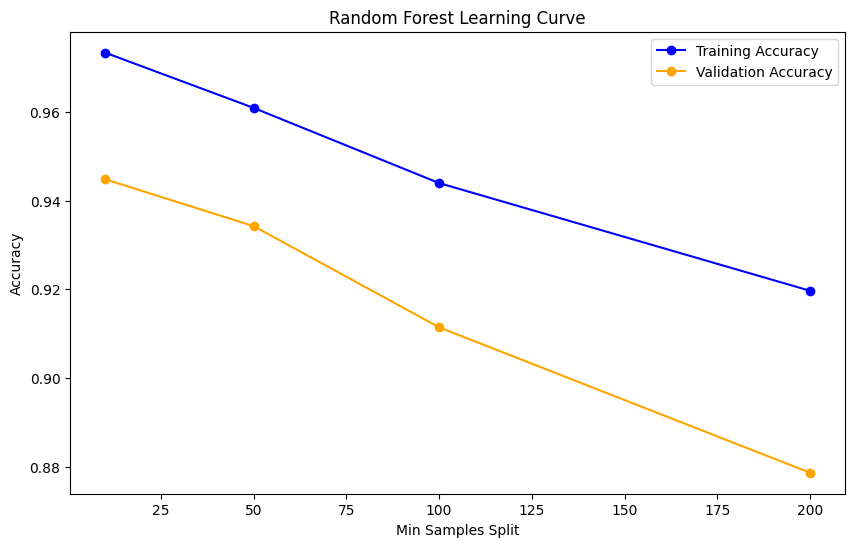

In [31]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in param_grid['min_samples_split']:
    mss_list.append(mss)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mss= mss
    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

2 min sample, Train Accuracy: 0.9754757135268938, Validation Accuracy: 0.9426959015635119
3 min sample, Train Accuracy: 0.9750521627129471, Validation Accuracy: 0.9428439263576649
4 min sample, Train Accuracy: 0.9750556344409302, Validation Accuracy: 0.9425293736700897
5 min sample, Train Accuracy: 0.9751458993684927, Validation Accuracy: 0.943880099916736
6 min sample, Train Accuracy: 0.9744376668599262, Validation Accuracy: 0.944028124710889
7 min sample, Train Accuracy: 0.9741321547974073, Validation Accuracy: 0.9438986030160051
8 min sample, Train Accuracy: 0.9747605375623609, Validation Accuracy: 0.9453603478582663
9 min sample, Train Accuracy: 0.9736461128797637, Validation Accuracy: 0.9452493292626515
10 min sample, Train Accuracy: 0.9733475442732111, Validation Accuracy: 0.9447867517809233
11 min sample, Train Accuracy: 0.9733544877291774, Validation Accuracy: 0.9453418447589972
12 min sample, Train Accuracy: 0.9728545588996012, Validation Accuracy: 0.945323341659728
13 min sam

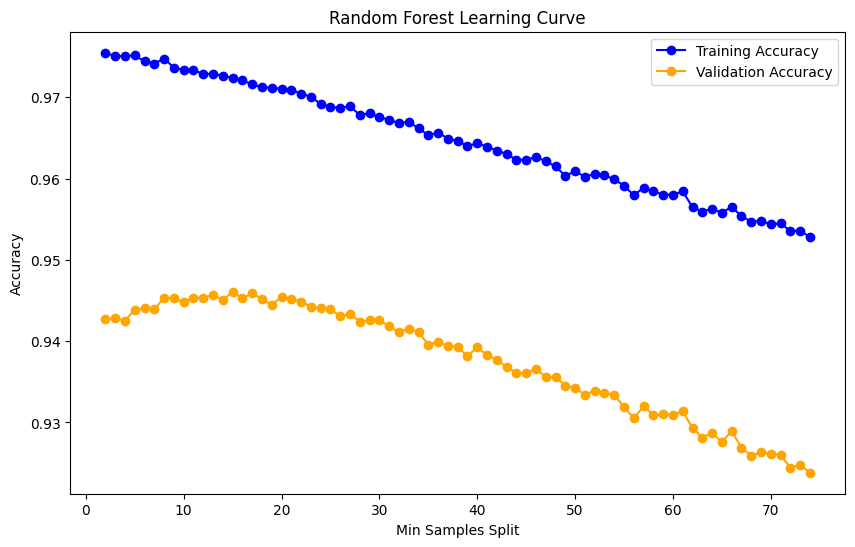

In [32]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in range(2,75):
    mss_list.append(mss)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mss= mss
    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [33]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

2 max leaf nodes, Train Accuracy: 0.49405813755680617, Validation Accuracy: 0.688463317605699
100 max leaf nodes, Train Accuracy: 0.8073677011258814, Validation Accuracy: 0.7234526783236193
200 max leaf nodes, Train Accuracy: 0.8347908804649338, Validation Accuracy: 0.7594782126006105
300 max leaf nodes, Train Accuracy: 0.859908832423162, Validation Accuracy: 0.7952632065871034
400 max leaf nodes, Train Accuracy: 0.8756565905548168, Validation Accuracy: 0.8154130816911833
500 max leaf nodes, Train Accuracy: 0.8884880971806097, Validation Accuracy: 0.8333980941807753
600 max leaf nodes, Train Accuracy: 0.8987505250988574, Validation Accuracy: 0.8489962068646498
700 max leaf nodes, Train Accuracy: 0.9063952701177957, Validation Accuracy: 0.8596354889443982
800 max leaf nodes, Train Accuracy: 0.9130366857495982, Validation Accuracy: 0.8686464982884633
900 max leaf nodes, Train Accuracy: 0.9185914505226687, Validation Accuracy: 0.8758257008048849
1000 max leaf nodes, Train Accuracy: 0.9234

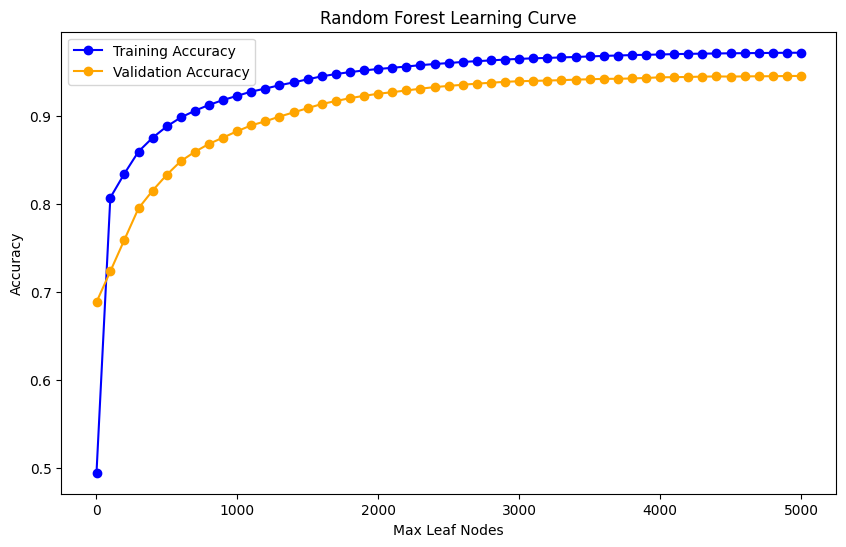

In [34]:
best_accuracy = 0
mln_list = []
train_acc_list = []
val_acc_list = []
for mln in param_grid['max_leaf_nodes']:
    mln_list.append(mln)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=mln, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mln} max leaf nodes, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_mln= mln
    
mln_df = pd.DataFrame({'Max Leaf Nodes': mln_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.plot(mln_df['Max Leaf Nodes'], mln_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mln_df['Max Leaf Nodes'], mln_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [35]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    }

1 min samples leaf, Train Accuracy: 0.9704625383191976, Validation Accuracy: 0.9444721990933481
100 min samples leaf, Train Accuracy: 0.880322592964196, Validation Accuracy: 0.823350911277639
200 min samples leaf, Train Accuracy: 0.8489937196440784, Validation Accuracy: 0.779406050513461
300 min samples leaf, Train Accuracy: 0.8347700500970348, Validation Accuracy: 0.7587010824313073
400 min samples leaf, Train Accuracy: 0.8247645300495415, Validation Accuracy: 0.7468220927005274
500 min samples leaf, Train Accuracy: 0.8166927624886735, Validation Accuracy: 0.735165140160977


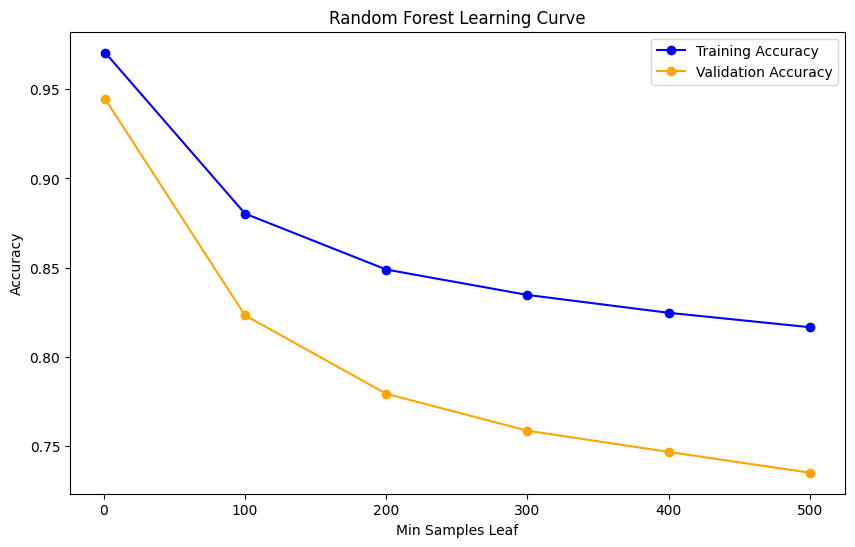

In [36]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in param_grid['min_samples_leaf']:
    msl_list.append(msl)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_msl= msl
    
msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

1 min samples leaf, Train Accuracy: 0.9704625383191976, Validation Accuracy: 0.9444721990933481
2 min samples leaf, Train Accuracy: 0.9702021587204599, Validation Accuracy: 0.9434915348320844
3 min samples leaf, Train Accuracy: 0.9699035901139074, Validation Accuracy: 0.9436210565269683
4 min samples leaf, Train Accuracy: 0.9694175481962637, Validation Accuracy: 0.9432509945415857
5 min samples leaf, Train Accuracy: 0.9690807905818963, Validation Accuracy: 0.9433250069386623
6 min samples leaf, Train Accuracy: 0.968417690537111, Validation Accuracy: 0.9420482930890924
7 min samples leaf, Train Accuracy: 0.9679490072593833, Validation Accuracy: 0.9416782311037099
8 min samples leaf, Train Accuracy: 0.9671366229113216, Validation Accuracy: 0.9402349893607179
9 min samples leaf, Train Accuracy: 0.9660812176044382, Validation Accuracy: 0.939513368489222
10 min samples leaf, Train Accuracy: 0.9650119253856222, Validation Accuracy: 0.9374410213710797
11 min samples leaf, Train Accuracy: 0.96

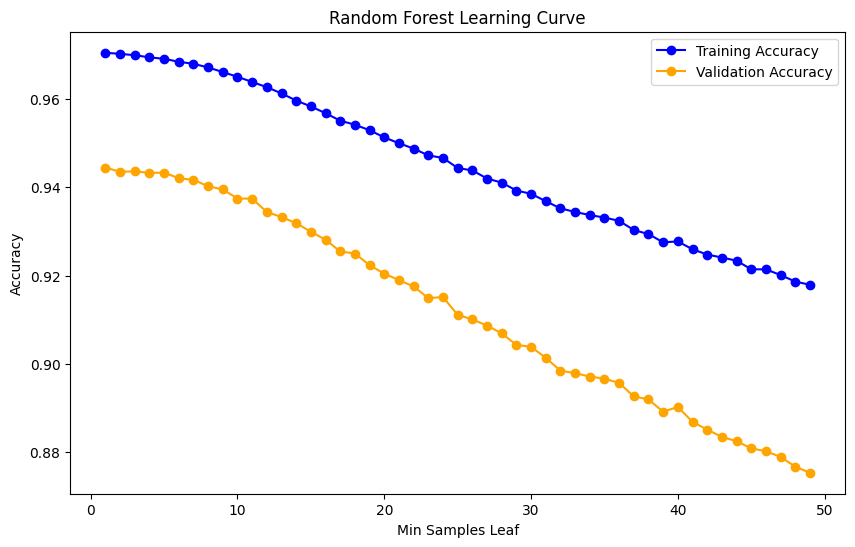

In [37]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in range(1,50):
    msl_list.append(msl)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_msl= msl
    
msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [38]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    }

0.1 max samples, Train Accuracy: 0.9064924785013244, Validation Accuracy: 0.8601165695253955
0.2 max samples, Train Accuracy: 0.9371061758569093, Validation Accuracy: 0.902100101767046
0.3 max samples, Train Accuracy: 0.9506736888151339, Validation Accuracy: 0.9198075677676011
0.4 max samples, Train Accuracy: 0.9558847525178708, Validation Accuracy: 0.9262281432139884
0.5 max samples, Train Accuracy: 0.9603216208803608, Validation Accuracy: 0.9324636876676843
0.6 max samples, Train Accuracy: 0.9622484299110197, Validation Accuracy: 0.9349245998704783
0.7 max samples, Train Accuracy: 0.9640502567342843, Validation Accuracy: 0.9371264686835045
0.8 max samples, Train Accuracy: 0.9653660416399055, Validation Accuracy: 0.9384586918308817
0.9 max samples, Train Accuracy: 0.9665012966904017, Validation Accuracy: 0.9396243870848368
1 max samples, Train Accuracy: 0.3397641308008235, Validation Accuracy: 0.5081691183273198


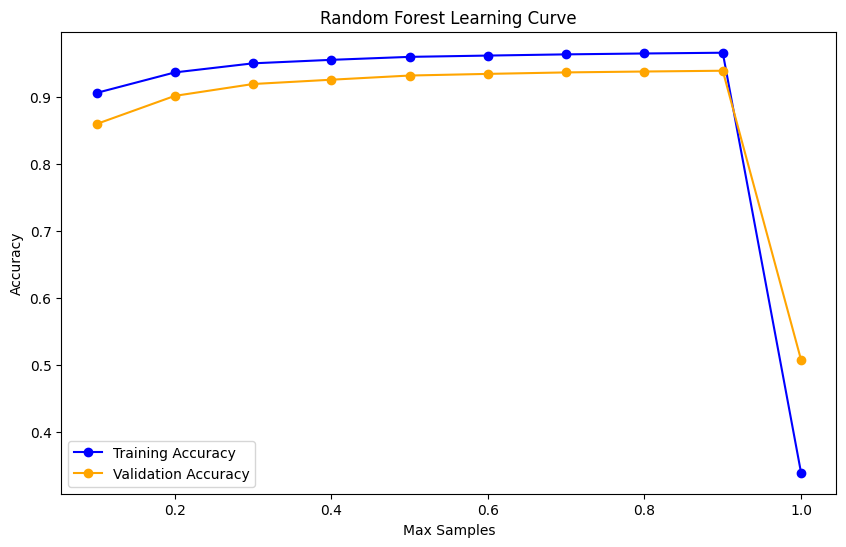

In [39]:
best_accuracy = 0
maxs_list = []
train_acc_list = []
val_acc_list = []

for maxs in param_grid['max_samples']:
    maxs_list.append(maxs)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=8, max_samples=maxs,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{maxs} max samples, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_maxs = maxs
    
maxs_df = pd.DataFrame({'Max Samples': maxs_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Samples')
plt.ylabel('Accuracy')
plt.plot(maxs_df['Max Samples'], maxs_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(maxs_df['Max Samples'], maxs_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [40]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    }

0.7 max samples, Train Accuracy: 0.9640502567342843, Validation Accuracy: 0.9371264686835045
0.75 max samples, Train Accuracy: 0.965091775129235, Validation Accuracy: 0.9391433065038394
0.8 max samples, Train Accuracy: 0.9653660416399055, Validation Accuracy: 0.9384586918308817
0.85 max samples, Train Accuracy: 0.9660603872365392, Validation Accuracy: 0.9392543250994542
0.9 max samples, Train Accuracy: 0.9665012966904017, Validation Accuracy: 0.9396243870848368
0.95 max samples, Train Accuracy: 0.9662061998118323, Validation Accuracy: 0.940531038949024
1 max samples, Train Accuracy: 0.3397641308008235, Validation Accuracy: 0.5081691183273198


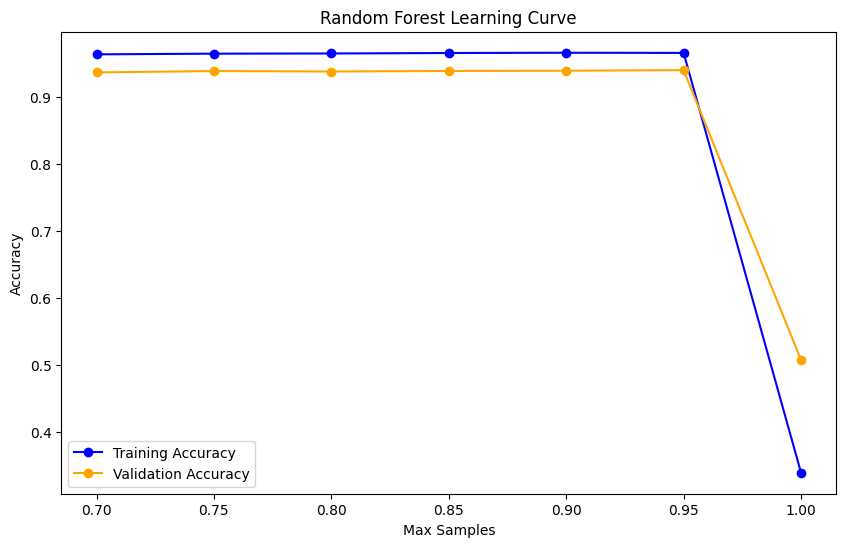

In [41]:
best_accuracy = 0
maxs_list = []
train_acc_list = []
val_acc_list = []

for maxs in param_grid['max_samples']:
    maxs_list.append(maxs)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=8, max_samples=maxs,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{maxs} max samples, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = val_accuracy
        best_maxs = maxs
    
maxs_df = pd.DataFrame({'Max Samples': maxs_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Samples')
plt.ylabel('Accuracy')
plt.plot(maxs_df['Max Samples'], maxs_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(maxs_df['Max Samples'], maxs_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [6]:
    
model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=8, max_samples=0.8,n_jobs=-1, random_state=7)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9653660416399055, Validation Accuracy: 0.9384586918308817, Test Accuracy: 0.9324624380134705


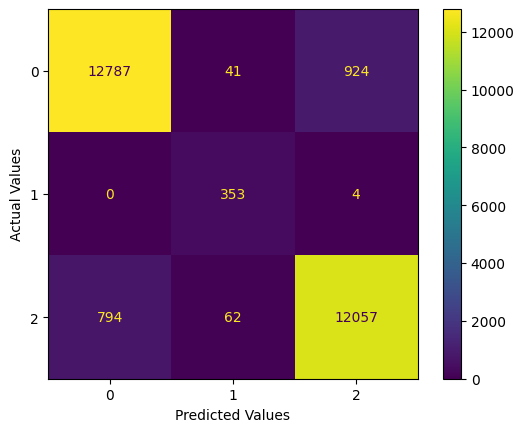

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     13752
           1       0.77      0.99      0.87       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.88      0.95      0.91     27022
weighted avg       0.93      0.93      0.93     27022



In [43]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Team 1', 'Tie', 'Team 2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred))

In [43]:
y_test_pred_list  = []
for y in y_test_pred:
    if y==0:
        y_test_pred_list.append("Y")
    elif y == 2:
        y_test_pred_list.append("N")
    elif y==1:
        y_test_pred_list.append("T")

In [44]:
y_test_pred_df = pd.DataFrame(y_test_pred_list, columns=["Winner Bat First"])

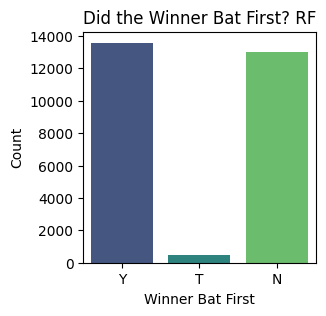

In [45]:
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner Bat First', data=y_test_pred_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Did the Winner Bat First? RF')
plt.show()

In [30]:
y_test_pred_df.value_counts(normalize=True)

Winner Bat First
Y                   0.502590
N                   0.480534
T                   0.016875
Name: proportion, dtype: float64

Mine shows less bias towards the second batting team

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Improved recall significantly, so it's now overpredicting that things are a tie, but that's preferable to incorrectly predicting one of the other two classes.  Also reduced the overfitting.

In [44]:
#REMEMBER TO CHANGE TERMINAL NODES TO LEAF NODES IN THE PARAM GRIDS

https://github.com/ngoix/scikit-learn/commit/2661da0d3578eda406dcf1867443d9f744165c5f

Use the tuned hyperparameters for a new RF

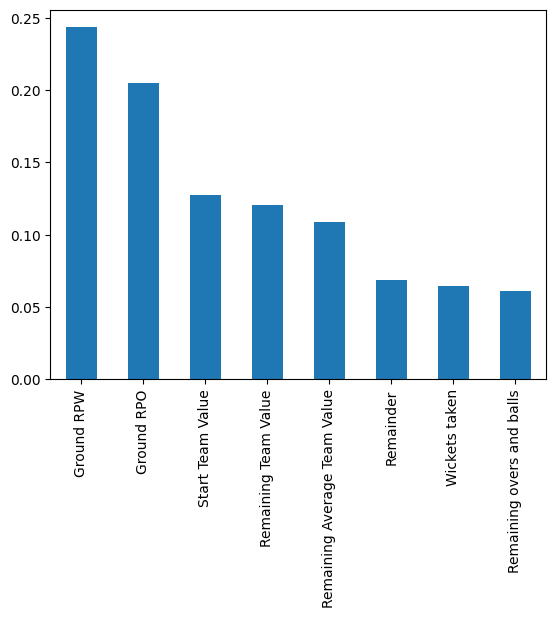

In [45]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Challenge with feature selection is that the question here is whether the run rate of the ground, team value and remainder improve the performance rate of wickets taken and remaining overs and balls.

In [46]:
data_train_df = pd.read_csv("data_train_csv")
data_smauto_train_df = pd.read_csv("data_smauto_train_csv")
data_smin_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [47]:
data_train_df = data_train_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)
data_smauto_train_df = data_smauto_train_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)
data_smin_train_df = data_smin_train_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)

data_test_df = data_test_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)
data_val_df = data_val_df.drop(['Remaining overs and balls', 'Remainder'], axis=1, inplace=False)

Training score: 0.921697692044145, Testing score: 0.9188439049663237


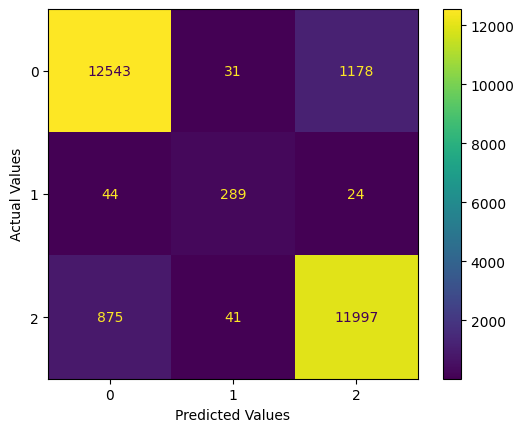

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13752
           1       0.80      0.81      0.81       357
           2       0.91      0.93      0.92     12913

    accuracy                           0.92     27022
   macro avg       0.88      0.88      0.88     27022
weighted avg       0.92      0.92      0.92     27022



In [48]:
rf(data_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9441379028467496, Testing score: 0.9128117829916365


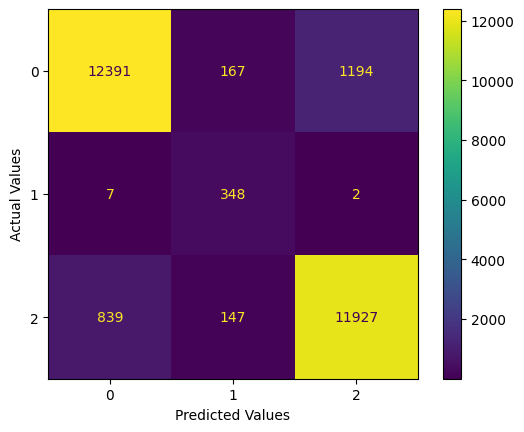

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     13752
           1       0.53      0.97      0.68       357
           2       0.91      0.92      0.92     12913

    accuracy                           0.91     27022
   macro avg       0.79      0.93      0.84     27022
weighted avg       0.92      0.91      0.91     27022



In [49]:
rf(data_smauto_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9435635899056037, Testing score: 0.9127377692250759


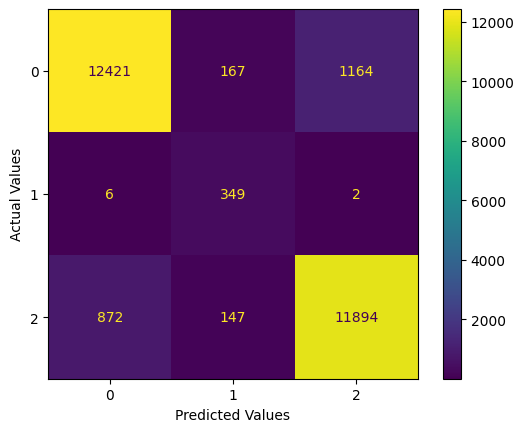

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     13752
           1       0.53      0.98      0.68       357
           2       0.91      0.92      0.92     12913

    accuracy                           0.91     27022
   macro avg       0.79      0.93      0.84     27022
weighted avg       0.92      0.91      0.91     27022



In [50]:
rf(data_smin_train_df, data_test_df, data_val_df, None, None)

Autoencoder to extract features?

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'data_df' with features (X) and labels (y)
# Replace 'your_dataframe.csv' with your actual DataFrame or CSV file.

# Build an Autoencoder
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 2  # Number of neurons in the encoding layer

# Encoder
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_layer = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoder_layer)

# Decoder
decoder_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder_layer)
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the Autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Extract features using the trained encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Use the encoded features with a Random Forest model
rf_classifier = RandomForestClassifier(random_state=47)
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\carth\AppData\Local\Temp\ipykernel_26472\3113653523.py", line 28, in <module>

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\carth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,8] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1445]

In [ ]:
sdfsdf

NameError: name 'sdfsdf' is not defined

https://www.datacamp.com/tutorial/random-forests-classifier-python